이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [9]:
# Train Data
# 모양
print('X train 모양:', X_train.shape)
print('y train 모양:', y_train.shape)
print()

# 크기
print('X train 크기:', X_train.size)
print('y train 크기:', y_train.size)
print()

# 결측치 여부
print('X train 결측치 개수:', np.isnan(X_train).sum())
print('y train 결측치 개수:', np.isnan(y_train).sum())

X train 모양: (60000, 28, 28)
y train 모양: (60000,)

X train 크기: 47040000
y train 크기: 60000

X train 결측치 개수: 0
y train 결측치 개수: 0


In [10]:
# Test Data
# 모양
print('X test 모양:', X_test.shape)
print('y test 모양:', y_test.shape)
print()

# 크기
print('X test 크기:', X_test.size)
print('y test 크기:', y_test.size)
print()

# 결측치 여부
print('X test 결측치 개수:', np.isnan(X_test).sum())
print('y test 결측치 개수:', np.isnan(y_test).sum())

X test 모양: (10000, 28, 28)
y test 모양: (10000,)

X test 크기: 7840000
y test 크기: 10000

X test 결측치 개수: 0
y test 결측치 개수: 0


### Data중 첫 번째 이미지를 보여주세요.

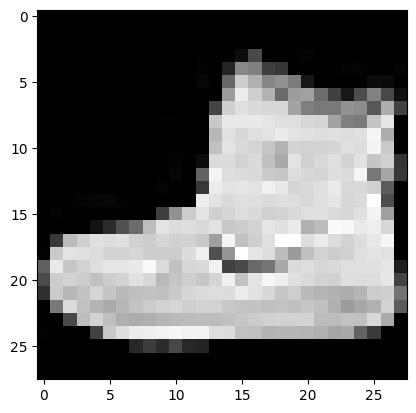

In [12]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# 정규화 확인 - 최소값과 최대값 출력
print("X_train Min:", X_train.min())
print("X_train Max:", X_train.max())
print("X_test Min:", X_test.min())
print("X_test Max:", X_test.max())

X_train Min: 0.0
X_train Max: 1.0
X_test Min: 0.0
X_test Max: 1.0


### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

(더블클릭하여 이곳에 작성)

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [18]:
# 원래 데이터 크기
X_train.shape

(60000, 28, 28)

In [35]:
X_train_flattened = X_train.reshape(-1, 28*28)

In [32]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)

X_train_pca.shape

(60000, 50)

- flatten 하는 이유는 원래의 이미지가 2차원이지만 PCA는 다차원 배열 형태가 아닌 1차원 벡터 형태로 된 데이터를 필요로 하기 때문이다.
- Flatten 과정을 통해 이미지가 하나의 긴 벡터로 변환되며, 각 픽셀 값이 벡터의 요소가 된다.

### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [33]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267,
       0.00992875, 0.00913255, 0.00765793, 0.00659706, 0.00607851,
       0.00589821, 0.00551934, 0.005245  , 0.00458079, 0.00455515,
       0.00433684, 0.00407097, 0.00384758, 0.00372551, 0.00361107,
       0.00350656, 0.00333241, 0.0031936 , 0.00308063, 0.00293273,
       0.00275603, 0.00265062, 0.00263703, 0.00255835, 0.00246212,
       0.00235901, 0.0023029 , 0.00225522, 0.00218476, 0.00209324,
       0.00200282, 0.0019574 , 0.00194689, 0.00182783, 0.00175354,
       0.00171926, 0.00168792, 0.00163975, 0.00160908, 0.00154846])

### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [34]:
X_train_reconstructed = pca.inverse_transform(X_train_pca)
reconstruction_error = mean_squared_error(X_train_flattened, X_train_reconstructed)

reconstruction_error

0.011947268890429847

### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [36]:
pca_30 = PCA(n_components=30)
X_train_pca_30 = pca_30.fit_transform(X_train_flattened)

X_train_pca_30.shape

(60000, 30)

In [37]:
explained_variance_ratio_30 = pca_30.explained_variance_ratio_
explained_variance_ratio_30

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267,
       0.00992875, 0.00913255, 0.00765793, 0.00659706, 0.00607851,
       0.00589821, 0.00551934, 0.005245  , 0.00458079, 0.00455515,
       0.00433684, 0.00407097, 0.00384758, 0.00372551, 0.00361107,
       0.00350656, 0.00333241, 0.0031936 , 0.00308063, 0.00293273])

In [38]:
X_train_reconstructed_30 = pca_30.inverse_transform(X_train_pca_30)
reconstruction_error_30 = mean_squared_error(X_train_flattened, X_train_reconstructed_30)

reconstruction_error_30

0.015597556679745819

### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

50차원으로 줄였을 때 MSE는 약 0.0119인 반면, 30차원에서는 MSE가 약 0.0156으로 증가했다. 이는 50차원보다 30차원이 원본 데이터를 설명하는 데 필요한 정보를 덜 포함하고 있음을 의미한다.

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [39]:
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train_flattened)

X_train_pca_2.shape

(60000, 2)

In [40]:
explained_variance_ratio_2 = pca_2.explained_variance_ratio_
explained_variance_ratio_2

array([0.29039228, 0.1775531 ])

In [41]:
X_train_reconstructed_2 = pca_2.inverse_transform(X_train_pca_2)
reconstruction_error_2 = mean_squared_error(X_train_flattened, X_train_reconstructed_2)

reconstruction_error_2

0.04629435827776491

### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

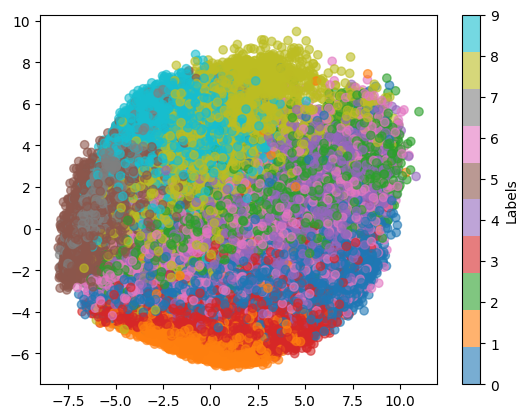

In [42]:
scatter = plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label="Labels")
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [44]:
tsne = TSNE(n_components=2, random_state=0)
train_images_tsne = tsne.fit_transform(X_train_pca)

scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=y_train, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Labels')
plt.show()

KeyboardInterrupt: 

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [ ]:
tsne2 = TSNE(n_components=2, random_state=0)
train_images_tsne_30 = tsne2.fit_transform(X_train_pca_30)

scatter = plt.scatter(train_images_tsne_30[:, 0], train_images_tsne_30[:, 1], c=y_train, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Labels')
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.


(더블클릭해서 이곳에 작성)